In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
import networkx as nx

In [2]:
def relu(x, width, bias):
  return np.maximum(width * x + bias, 0)

In [6]:
x = np.linspace(0, 1, 100)

# Calculate output values using ReLU function
output_neuron_1 = relu(x, 6.0, 0.0)
output_neuron_2 = relu(output_neuron_1, -1.0, 0.70)
output_neuron_3 = np.dot(output_neuron_2, -1.0)

output_neuron_4 = relu(x, 0, 0)
output_neuron_5 = relu(output_neuron_4, 0, 1)
output_neuron_6 = np.dot(output_neuron_5, 0.70)

final_output = output_neuron_3 + output_neuron_6

In [4]:
y_sin = np.sin(np.linspace(0, 2 * np.pi, 100))

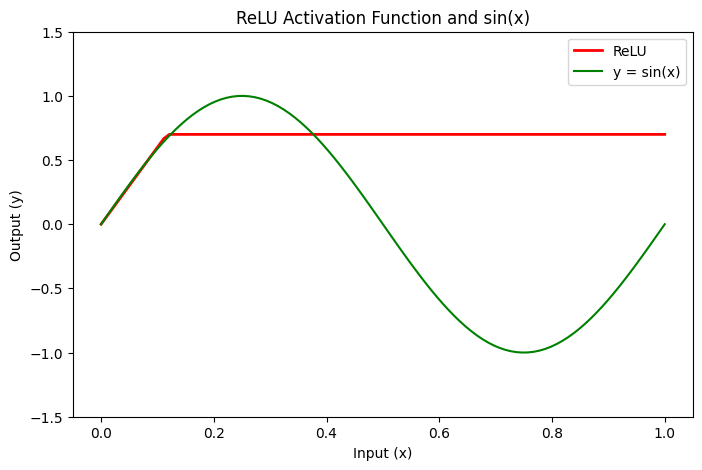

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(x, final_output, label='ReLU', color='r', linewidth=2)  
plt.plot(np.linspace(0, 1, 100), y_sin, label='y = sin(x)', color='g') # type: ignore
# plt.axhline(0, color='black')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('ReLU Activation Function and sin(x)')
plt.legend() 
plt.ylim(-1.5, 1.5)  # Set y-axis range from -1 to 1
plt.show()

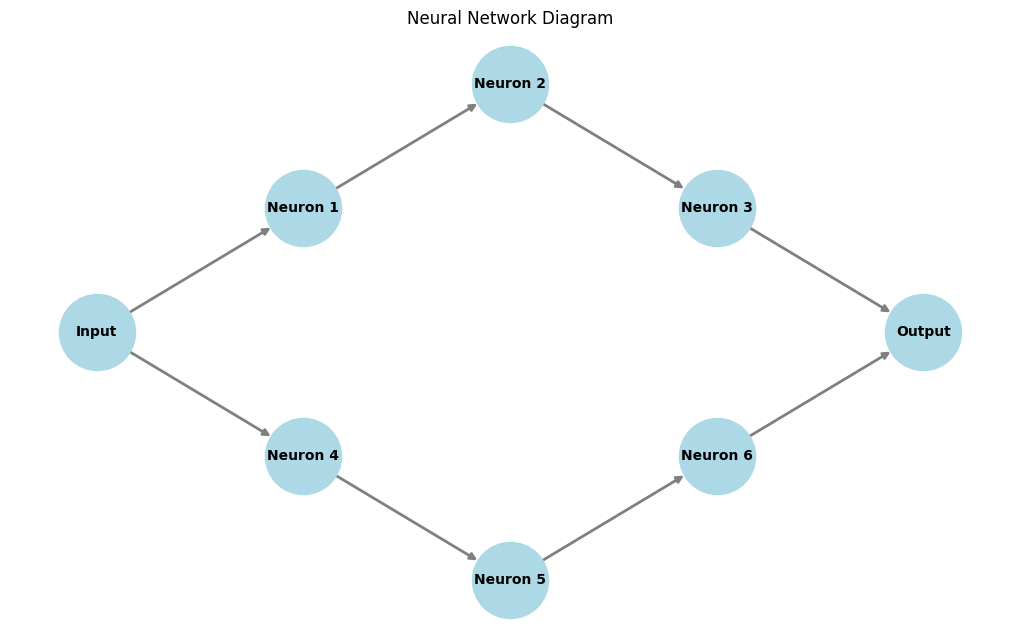

In [21]:
G = nx.DiGraph()

# Add nodes with attributes
G.add_node("Input", pos=(0, 0))
G.add_node("Neuron 1", pos=(1, 1))
G.add_node("Neuron 2", pos=(2, 2))
G.add_node("Neuron 3", pos=(3, 1))
G.add_node("Neuron 4", pos=(1, -1))
G.add_node("Neuron 5", pos=(2, -2))
G.add_node("Neuron 6", pos=(3, -1))
G.add_node("Output", pos=(4, 0))

# Add edges between nodes
edges = [
    ("Input", "Neuron 1"),
    ("Neuron 1", "Neuron 2"),
    ("Neuron 2", "Neuron 3"),
    ("Input", "Neuron 4"),
    ("Neuron 4", "Neuron 5"),
    ("Neuron 5", "Neuron 6"),
    ("Neuron 3", "Output"),
    ("Neuron 6", "Output")
]
G.add_edges_from(edges)
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2, arrows=True)

# Show the plot
plt.title('Neural Network Diagram')
plt.show()

In [24]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

In [25]:
network = DrawNN( [2,8,8,1] )
network.draw()

NameError: name 'xrange' is not defined